# Anomaly Detection in Electrocardigram Readings

### by Jared Godar

![ecg](images/ecg.jpeg)

## Introduction

Real-world anomaly detection for time series is still a challenging task. This is especially true for periodic or quasi-periodic time series since automated approaches have to learn long-term correlations before they are able to detect anomalies. ECG time series are a prominent, real-world example of quasi-periodic signals (1).

Until recently, virtually all ECG measurements took place in a clinical setting. At a doctor's office or hospital, ordered by a medical professional, who would be interpreting the results as or shortly after the data were acquired.

![clinic](images/clinic.jpeg)

With the emerging trend of wearable fitness devices, for the first time people have the ability to measure their own ECGs at home or anywhere any time.

![ecg](images/watch.jpeg)

The only thing missing is the clinician to interpret the data and tell you if it is normal or not.

As these tests are being made more widely available in non-clinical settings, the ability to automatically detect, label, and report abnormal readings appropriately is critical.

---

## Goal

The goal of this project is to detect anomalies in ECG signals.

I will predict if a heartbeat from an ECG signal is normal or abnormal based on a six-second window centered on the peak of that hearbeat.

---

## Dataset

I will use the MIT-Beth Israel Hospital  Arrhythmia Database. The database was the first generally available set of standard test material for evaluation of arrhythmia detectors, and has been used for that purpose as well as for basic research into cardiac dynamics at more than 500 sites worldwide.

 https://physionet.org/content/mitdb/1.0.0/

The MIT-BIH Arrhythmia Database contains 48 half-hour excerpts of two-channel ambulatory ECG recordings, obtained from 47 subjects studied by the BIH Arrhythmia Laboratory between 1975 and 1979. 

Two or more cardiologists independently annotated each record. Disagreements were resolved to obtain the computer-readable reference annotations for each beat (approximately 110,000 annotations in all) included with the database.

The subjects were 25 men aged 32 to 89 years, and 22 women aged 23 to 89 years.

Twenty-three recordings were chosen at random from a set of 4000 24-hour ECG recordings. This first group is intended to serve as a representative sample of the variety of waveforms and artifacts that an arrhythmia detector might encounter in routine clinical use. 

The remaining 25 recordings were selected from the same set to include less common, but clinically significant arrhythmias that would not be well-represented in a small random sample. Records in the second group were chosen to include complex ventricular, junctional, and supraventricular arrhythmias and conduction abnormalities. Several of these records were selected because features of the rhythm, QRS morphology variation, or signal quality may be expected to present significant difficulty to arrhythmia detectors. 

**NOTE:** *This means these abnormal examples were specifically chosen to be the hardest of the hard for classifiers. The problems these pose for computational biologists have been noted and either celebrated or despised (or both) for decades. Model performance statistics on these data will likely underpreform compared to what one may reasonably expect to encounter in an average, random sample*




<h3>Symbols used in plots</h3>

<p>
An expanded and updated version of the table below can be found at
<a href="/physiobank/annotations.shtml">
<tt>http://www.physionet.org/physiobank/annotations.shtml</tt></a>

<p>
<table border>
<tr><th><i>Symbol</i></th><th><i>Meaning</i></th></tr>
<tr><td><b>&middot;</b> <i>or</i> N</td><td>Normal beat</td></tr>
<tr><td>L</td><td>Left bundle branch block beat</td></tr>
<tr><td>R</td><td>Right bundle branch block beat</td></tr>
<tr><td>A</td><td>Atrial premature beat</td></tr>
<tr><td>a</td><td>Aberrated atrial premature beat</td></tr>
<tr><td>J</td><td>Nodal (junctional) premature beat</td></tr>
<tr><td>S</td><td>Supraventricular premature beat</td></tr>
<tr><td>V</td><td>Premature ventricular contraction</td></tr>
<tr><td>F</td><td>Fusion of ventricular and normal beat</td></tr>
<tr><td>[</td><td>Start of ventricular flutter/fibrillation</td></tr>
<tr><td>!</td><td>Ventricular flutter wave</td></tr>
<tr><td>]</td><td>End of ventricular flutter/fibrillation</td></tr>
<tr><td>e</td><td>Atrial escape beat</td></tr>
<tr><td>j</td><td>Nodal (junctional) escape beat</td></tr>
<tr><td>E</td><td>Ventricular escape beat</td></tr>
<tr><td>/</td><td>Paced beat</td></tr>
<tr><td>f</td><td>Fusion of paced and normal beat</td></tr>
<tr><td>x</td><td>Non-conducted P-wave (blocked APB)</td></tr>
<tr><td>Q</td><td>Unclassifiable beat</td></tr>
<tr><td>|</td><td>Isolated QRS-like artifact</td></tr>
<tr><td colspan=2 align=center>Rhythm annotations appear <i>below</i> the
level used for beat annotations:</td></tr>
<tr><td>(AB</td><td>Atrial bigeminy</td></tr>
<tr><td>(AFIB</td><td>Atrial fibrillation</td></tr>
<tr><td>(AFL</td><td>Atrial flutter</td></tr>
<tr><td>(B</td><td>Ventricular bigeminy</td></tr>
<tr><td>(BII</td><td>2&deg; heart block</td></tr>
<tr><td>(IVR</td><td>Idioventricular rhythm</td></tr>
<tr><td>(N</td><td>Normal sinus rhythm</td></tr>
<tr><td>(NOD</td><td>Nodal (A-V junctional) rhythm</td></tr>
<tr><td>(P</td><td>Paced rhythm</td></tr>
<tr><td>(PREX</td><td>Pre-excitation (WPW)</td></tr>
<tr><td>(SBR</td><td>Sinus bradycardia</td></tr>
<tr><td>(SVTA</td><td>Supraventricular tachyarrhythmia</td></tr>
<tr><td>(T</td><td>Ventricular trigeminy</td></tr>
<tr><td>(VFL</td><td>Ventricular flutter</td></tr>
<tr><td>(VT</td><td>Ventricular tachycardia</td></tr>
<tr><td colspan=2 align=center>Signal quality and comment annotations appear <i>above</i>
the level used for beat annotations:</td></tr>
<tr><td><i>qq</i></td>
<td>
Signal quality change:  the first character (`c' or `n') indicates the quality
of the upper signal (clean or noisy), and the second character indicates the
quality of the lower signal</td></tr>
<tr><td>U</td><td>Extreme noise or signal loss in both signals:  ECG is unreadable</td></tr>
<tr><td>M (<i>or</i> MISSB)</td><td>Missed beat</td></tr>
<tr><td>P (<i>or</i> PSE)</td><td>Pause</td></tr>
<tr><td>T (<i>or</i> TS)</td><td>Tape slippage</td></tr>
</table>


**NOTE:** *It is not essential that one understand what all or any of these abnormalities actually mean physiologically. Of course, it can't hurt if you do. But, our model doesn't know or care what the underpinning defect is - just that this trace differs from the normal ones in some way.*

For the purposes of this project, I disregarded non-beat labels and converted all of the assorted abnormalities into a boolean column representing "normal" or "abnormal".

By having a richer dataset where the exact nature of the abnormality is specified and labeled, I can perform *post hoc* analysis of my false positives and false negatives as well as true positives and true negatives to determine if there are specific abnormalities that the algorithm is better or worse at predicting in order to determine where to focus efforts on improving the model or being aware of blind spots.

---

### What the heck am I looking at?

- Here I will briefly describe some of the salient features of an ECG trace, should you wish to orient yourself to what you are looking at.

- Let me reiterate that it doesen't really matter if you know what any of this means, because the algorithm doesn't understand it either.
  
- So, feel free to skip this, or take a stab at grocking it if you want.

![ecg](images/labelec_ecg.png)

The three main components are:

- **P wave** representing the depolarization of the atria.
- **QRS Complex** which represents the depolarization of the ventricles
- **T wave** repolarization of the ventricles.

During each heartbeat, a healthy heart has an orderly progression of depolarization that starts with pacemaker cells in the sinoatrial node, spreads throughout the atrium, and passes through the atrioventricular node down into the bundle of His and into the Purkinje fibers, spreading down and to the left throughout the ventricles (3).

This orderly pattern of depolarization gives rise to the characteristic ECG tracing. To the trained clinician, an ECG conveys a large amount of information about the structure of the heart and the function of its electrical conduction system(4).

 Among other things, an ECG can be used to measure the rate and rhythm of heartbeats, the size and position of the heart chambers, the presence of any damage to the heart's muscle cells or conduction system, the effects of heart drugs, and the function of implanted pacemakers (5).

---

### Works Cited

<p></p>

1. Thill, M, et. al. 2019 'Anomaly Detection in Electrocardiogram Readings with Stacked LSTM Networks', *Proceedings of the 19th Conference Information Technologies - Applications and Theory (ITAT 2019)*, p 17-25
<p></p>
   

2. Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). 'PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals' *Circulation* [Online]. 101 (23), pp. e215–e220.
<p></p>

3. Lilly, Leonard S, ed. (2016). *Pathophysiology of Heart Disease: A Collaborative Project of Medical Students and Faculty (sixth ed.)*. Lippincott Williams & Wilkins. p. 80. ISBN 978-1451192759.
<p></p>

4. Walraven, Gail (2011). *Basic arrhythmias (7th ed.)*. Boston: Brady/Pearson. pp. 1–11. ISBN 978-0-13-500238-4. OCLC 505018241.
<p></p>

5. Braunwald, Eugene, ed. (1997). *Heart Disease: A Textbook of Cardiovascular Medicine (5th ed.)*. Philadelphia: Saunders. p. 118. ISBN 0-7216-5666-8. OCLC 32970742.

---

### Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from os import listdir

import wfdb #PyPi package for loading ecg and annotations

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import wrangle

---

### Wrangle

In [2]:
X_train, X_validate, X_test, Y_train, Y_validate, Y_test, sym_train, sym_validate, sym_test, p_signal, atr_sym, atr_sample, ab_index = wrangle.wrangle()

Define path and patient numbers...
Annotations loaded...
Loading ecg files...
Creating dataset...
(This usually takes a while...)
Dataframes created...
Splitting train, validate, test...
This also takes a while...
All done.


This gives me an overall dataset of 75052 normal cardiac cycles, 34409 examples of abnormalities, and 3186 non-beat features which will be excluded from training and modeling.

Since a random forest approach is used, it is unnecessary to scale these data. There may be meaningful information in the amplitude values that would be lost or masked when scaled.

---

## Explore

First, concatenate the target back on the training set so I have access to the answers when vizualizing things.

In [3]:
X_explore_df = X_train.copy()
X_explore_df['abnormal']=Y_train.copy()
#X_explore_df['sym']=sym_train.copy()

Now, create separate dataframes for normal and abnormal heartbeats

In [4]:
X_explore_normal = X_explore_df[X_explore_df.abnormal==0]
X_explore_abnormal = X_explore_df[X_explore_df.abnormal==1]

### Question 1: What do normal heartbeats look like?

Let's visualize some normal heartbeats:

Keep in mind, the normal / abnormal heartbeat in question is in the middle of the plot, and it is flaked by 3 seconds of preceding data and 3 seconds of data after the beat in question. So, keep in mind there may be abnormal heatbeats before or after the central beat in question.

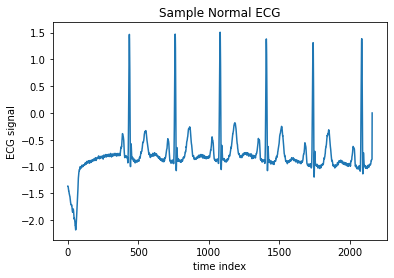

In [5]:
plt.plot(np.arange(2161), X_explore_normal.iloc[0]);
plt.title('Sample Normal ECG');
plt.xlabel('time index');
plt.ylabel('ECG signal');


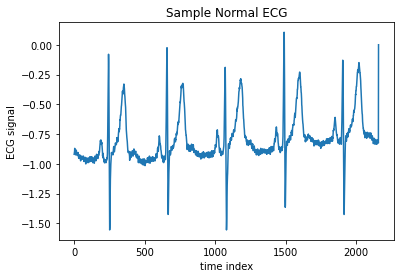

In [6]:
plt.plot(np.arange(2161), X_explore_normal.iloc[1]);
plt.title('Sample Normal ECG');
plt.xlabel('time index');
plt.ylabel('ECG signal');

Text(0, 0.5, 'ECG signal')

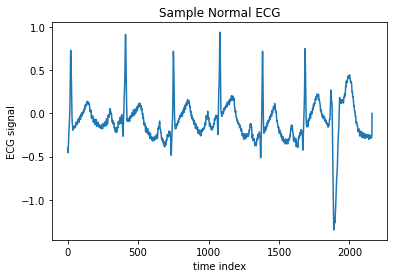

In [7]:
plt.plot(np.arange(2161), X_explore_normal.iloc[2]);
plt.title('Sample Normal ECG');
plt.xlabel('time index')
plt.ylabel('ECG signal')


### Question 2: What do abnormal heartbeats look like?

And some abnormal ones:

Text(0, 0.5, 'ECG signal')

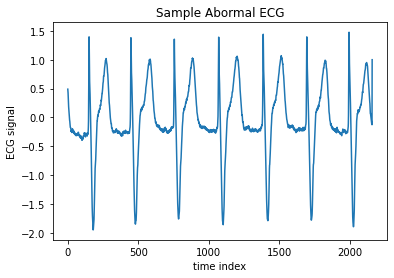

In [8]:
plt.plot(np.arange(2161), X_explore_abnormal.iloc[0]);
plt.title('Sample Abormal ECG');
plt.xlabel('time index')
plt.ylabel('ECG signal')

Text(0, 0.5, 'ECG signal')

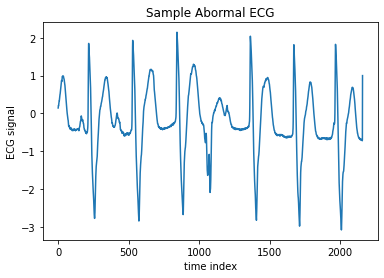

In [9]:
plt.plot(np.arange(2161), X_explore_abnormal.iloc[1]);
plt.title('Sample Abormal ECG');
plt.xlabel('time index')
plt.ylabel('ECG signal')

Text(0, 0.5, 'ECG signal')

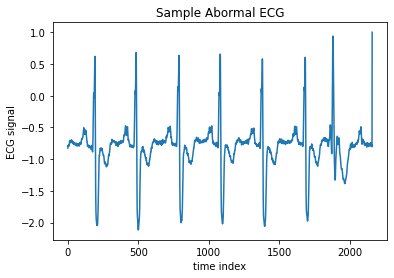

In [10]:
plt.plot(np.arange(2161), X_explore_abnormal.iloc[2]);
plt.title('Sample Abormal ECG');
plt.xlabel('time index')
plt.ylabel('ECG signal')

Here, I will plot an abnormal beat from our abnormal index and show 3 seconds before and after the abnormality

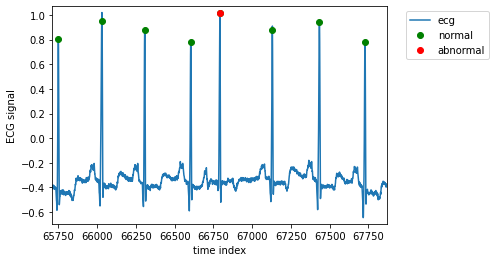

In [11]:
x = np.arange(len(p_signal))

left = ab_index[1]-1080
right = ab_index[1]+1080

plt.plot(x[left:right],p_signal[left:right,0],'-',label='ecg',)
plt.plot(x[atr_sample],p_signal[atr_sample,0],'go',label ='normal')
plt.plot(x[ab_index],p_signal[ab_index,0],'ro',label='abnormal')

plt.xlim(left,right)
plt.ylim(p_signal[left:right].min()-0.05,p_signal[left:right,0].max()+0.05)
plt.xlabel('time index')
plt.ylabel('ECG signal')
plt.legend(bbox_to_anchor = (1.04,1), loc = 'upper left')
plt.show()


---

This time series data does not lend itself to many of the data exploration and traditional hypothesis-testing statistical methods encountered in the previous projects.

In [12]:
import statsmodels.api as sm


### Autocorrelation plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

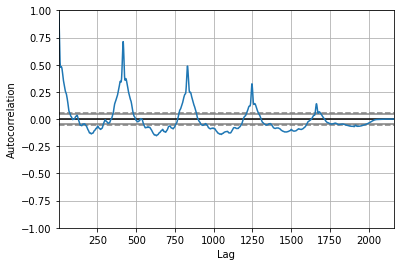

In [13]:
pd.plotting.autocorrelation_plot(X_explore_normal.iloc[1])


---

## Modeling

### Baseline

Use the mode, or most common value (normal), as the baseline prediction.



In [74]:
# Set baseline to mode
baseline = Y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = Y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 3)}")

Baseline accuracy: 0    0.684
dtype: float64


### Make random forest models varying hyperparameters and evaluate performance

In [17]:
# Parameters

min_samples_leaf=3
n_estimators=100
max_depth=3

In [18]:
# Make the object
rf1 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=min_samples_leaf,
                            n_estimators=n_estimators,
                            max_depth=max_depth, 
                            random_state=123)

In [19]:
# Fit the object
rf1.fit(X_train, Y_train)


/var/folders/9y/17ptyrds267724n2_7s7hx340000gn/T/ipykernel_57723/1936475531.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, Y_train)


RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [20]:
#Make Predictions
y_pred_train_rf1 = rf1.predict(X_train)
y_pred_validate_rf1 = rf1.predict(X_validate)


In [21]:
# Make evaluation dataframes

train_eval = Y_train.copy()
train_eval['rf1_prediction'] = y_pred_train_rf1
train_eval.columns.values[0]='actual'

validate_eval = Y_validate.copy()
validate_eval['rf1_prediction'] = y_pred_validate_rf1
validate_eval.columns.values[0]='actual'


In [24]:
print('Accuracy of random forest classifier 1 on training set: {:.2f}'
     .format(rf1.score(X_train, Y_train)))

Accuracy of random forest classifier 1 on training set: 0.84


In [25]:
print(confusion_matrix(Y_train, y_pred_train_rf1))


[[53533   234]
 [12162 12622]]


In [38]:
tn_train_rf1, fp_train_rf1, fn_train_rf1, tp_train_rf1 = confusion_matrix(Y_train, y_pred_train_rf1).ravel()

In [42]:
rf1_train_report = classification_report(Y_train, y_pred_train_rf1, output_dict=True)
print('Random Forest 1: Depth 3 - Train')
pd.DataFrame(rf1_train_report)

Random Forest 1: Depth 3 - Train


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.814872,0.981798,0.842192,0.898335,0.867540
recall,0.995648,0.509280,0.842192,0.752464,0.842192
f1-score,0.896235,0.670670,0.842192,0.783452,0.825066
support,53767.000000,24784.000000,0.842192,78551.000000,78551.000000


In [27]:
print('Accuracy of random forest classifier 1 on validation set: {:.2f}'
     .format(rf1.score(X_validate, y_pred_validate_rf1)))

Accuracy of random forest classifier 1 on validation set: 1.00


In [28]:
print(confusion_matrix(Y_validate, y_pred_validate_rf1))


[[13485    53]
 [ 2986  3114]]


In [43]:
tn_validate_rf1, fp_validate_rf1, fn_validate_rf1, tp_validate_rf1 = confusion_matrix(Y_validate, y_pred_validate_rf1).ravel()

In [37]:
rf1_validate_report = classification_report(Y_validate, y_pred_validate_rf1, output_dict=True)
print('Random Forest 1: Depth 3 - Validation')
pd.DataFrame(rf1_validate_report)

Random Forest 1: Depth 3


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.818712,0.983265,0.845249,0.900988,0.869826
recall,0.996085,0.510492,0.845249,0.753288,0.845249
f1-score,0.898730,0.672062,0.845249,0.785396,0.828322
support,13538.000000,6100.000000,0.845249,19638.000000,19638.000000


In [47]:
ALL = tn_validate_rf1 + fp_validate_rf1 + fn_validate_rf1 + tp_validate_rf1

rf1_validate_accuracy = round((tp_validate_rf1 + tn_validate_rf1)/ALL,3)
print(f"Accuracy: {rf1_validate_accuracy}")

rf1_validate_true_positive_rate = round(tp_validate_rf1/(tp_validate_rf1+fn_validate_rf1), 3)
print(f"True Positive Rate: {rf1_validate_true_positive_rate}")

rf1_validate_false_positive_rate = round(fp_validate_rf1/(fp_validate_rf1+tn_validate_rf1), 3)
print(f"False Positive Rate: {rf1_validate_false_positive_rate}")

rf1_validate_true_negative_rate = round(tn_validate_rf1/(tn_validate_rf1+fp_validate_rf1), 3)
print(f"True Negative Rate: {rf1_validate_true_negative_rate}")

rf1_validate_false_negative_rate = round(fn_validate_rf1/(fn_validate_rf1+tp_validate_rf1), 3)
print(f"False Negative Rate: {rf1_validate_false_negative_rate}")

rf1_validate_precision = round(tp_validate_rf1/(tp_validate_rf1+fp_validate_rf1), 3)
print(f"Precision: {rf1_validate_precision}")

rf1_validate_recall = round(tp_validate_rf1/(tp_validate_rf1+fn_validate_rf1), 3)
print(f"Recall: {rf1_validate_recall}")

rf1_validate_f1_score = round(2*(rf1_validate_precision*rf1_validate_recall)/(rf1_validate_precision+rf1_validate_recall), 3)
print(f"F1 Score: {rf1_validate_f1_score}")

rf1_validate_support_pos = round((tp_validate_rf1 + fn_validate_rf1), 3)
print(f"Support (0): {rf1_validate_support_pos}")

rf1_validate_support_neg = round((fp_validate_rf1 + tn_validate_rf1), 3)
print(f"Support (1): {rf1_validate_support_neg}")

Accuracy: 0.845
True Positive Rate: 0.51
False Positive Rate: 0.004
True Negative Rate: 0.996
False Negative Rate: 0.49
Precision: 0.983
Recall: 0.51
F1 Score: 0.672
Support (0): 6100
Support (1): 13538


Additional metrics / summary statistics to consider:

Model                          |   Accuracy |   Balanced Accuracy |   ROC AUC |   F1 Score |

## Optimize Hyperparameters





### Loop through depth while checking for overfitting

- Compare the train and validate accuracy at various tree depth

In [93]:
# Look a
metrics = []

for i in range(2, 21):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, Y_train)

    forest_predict_train=forest.predict(X_train)
    forest_predict_validate=forest.predict(X_validate)

    # Use the model
    #We'll evaluate the model's performance on train, first
    cm1 = confusion_matrix(Y_train, forest_predict_train)
    in_sample_accuracy = forest.score(X_train, Y_train)
    in_sample_specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    cm2 = confusion_matrix(Y_validate, forest_predict_validate)
    out_of_sample_accuracy = forest.score(X_validate, Y_validate)
    out_of_sample_specificity = cm2[0,0]/(cm2[0,0]+cm2[0,1])

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy,
        "train_specificity": in_sample_specificity,
        'validate_specificity': out_of_sample_specificity

    }
    
    metrics.append(output)
    
overfit_df = pd.DataFrame(metrics)
overfit_df["accuracy_difference"] = overfit_df.train_accuracy - overfit_df.validate_accuracy
overfit_df['specificity_difference']=overfit_df.train_specificity - overfit_df.validate_specificity
overfit_df

/var/folders/9y/17ptyrds267724n2_7s7hx340000gn/T/ipykernel_57723/3890908901.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest = forest.fit(X_train, Y_train)
/var/folders/9y/17ptyrds267724n2_7s7hx340000gn/T/ipykernel_57723/3890908901.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest = forest.fit(X_train, Y_train)
/var/folders/9y/17ptyrds267724n2_7s7hx340000gn/T/ipykernel_57723/3890908901.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest = forest.fit(X_train, Y_train)
/var/folders/9y/17ptyrds267724n2_7s7hx340000gn/T/ipykernel_57723/3890908901.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

,max_depth,train_accuracy,validate_accuracy,train_specificity,validate_specificity,accuracy_difference,specificity_difference
0,2,0.791817,0.795651,0.996578,0.997341,-0.003835,-0.000763
1,3,0.842192,0.845249,0.995648,0.996085,-0.003057,-0.000437
2,4,0.869282,0.871830,0.996894,0.996676,-0.002548,0.000218
3,5,0.887958,0.890671,0.997396,0.996676,-0.002713,0.000720
4,6,0.902420,0.903147,0.998084,0.997415,-0.000727,0.000670
5,7,0.922305,0.921020,0.998754,0.997489,0.001285,0.001265
6,8,0.937455,0.936603,0.999144,0.998006,0.000852,0.001139
7,9,0.946506,0.943732,0.999554,0.998227,0.002775,0.001326
8,10,0.954806,0.950962,0.999814,0.998079,0.003844,0.001735
9,11,0.961388,0.955953,0.999814,0.997858,0.005435,0.001956


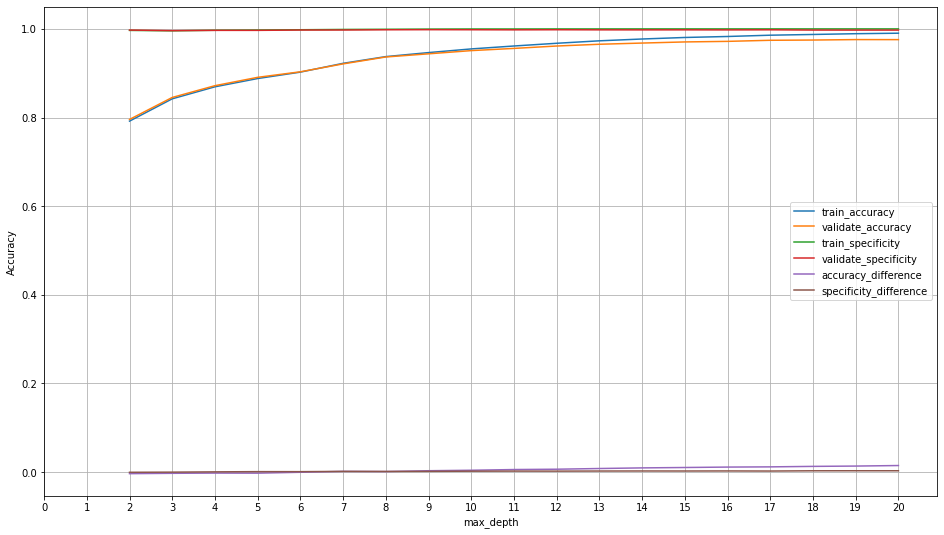

In [95]:
overfit_df.set_index('max_depth').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

Even up to a depth of 20, the in sample and out of sample data improve at similar rates with a minimal difference and no obvious signs of divergence or overfitting.

When time allows, run the loop above again to a nigher depth.

The rate of improvement declines at a max depth of 8-10. 

Moving forward, a depth of 10 will be used.

In [53]:
# Parameters

min_samples_leaf=3
max_depth=10

In [54]:
# Make the object
rf_final = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=min_samples_leaf,
                            max_depth=max_depth, 
                            random_state=123)

In [55]:
# Fit the object
rf_final.fit(X_train, Y_train)

/var/folders/9y/17ptyrds267724n2_7s7hx340000gn/T/ipykernel_57723/1229459097.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_final.fit(X_train, Y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=3, random_state=123)

In [56]:
#Make Predictions
y_pred_train_rf_final = rf_final.predict(X_train)
y_pred_validate_rf_final = rf_final.predict(X_validate)


In [57]:
print('Accuracy of random forest classifier final on training set: {:.2f}'
     .format(rf_final.score(X_train, Y_train)))

Accuracy of random forest classifier final on training set: 0.96


In [58]:
print(confusion_matrix(Y_train, y_pred_train_rf_final))


[[53746    21]
 [ 3464 21320]]


In [60]:
rf_final_train_report = classification_report(Y_train, y_pred_train_rf_final, output_dict=True)
print('Random Forest 1: Depth 3 - Train')
pd.DataFrame(rf_final_train_report)

Random Forest 1: Depth 3 - Train


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.939451,0.999016,0.955634,0.969234,0.958245
recall,0.999609,0.860232,0.955634,0.929921,0.955634
f1-score,0.968597,0.924444,0.955634,0.946521,0.954666
support,53767.000000,24784.000000,0.955634,78551.000000,78551.000000


---

## Evaluation


In this case, false negatives would have the poorest and most severe health outcomes since the algorithm would be reporting that your ECG readings were normal when you actually have an abnormal reading indicative of a problem.

So, sensitivity will be the metric optimized as it is most sensitive to false negatives.

---

## Testing

The best performing model was a ramdom forest with a depth of 10.

I will now test that model once and only once on the testing dataset. 

**NOTE:** This is the one and only time the testing data will be used.

In [64]:
y_pred_test = rf_final.predict(X_test)


In [65]:
print('Accuracy of random forest classifier  on test set: {:.2f}'
     .format(rf_final.score(X_test, Y_test)))

Accuracy of random forest classifier  on test set: 0.95


In [66]:
#Print confusion matrix
print(confusion_matrix(Y_test, y_pred_test))


[[7473   17]
 [ 497 2923]]


In [72]:
# Save values of 
tn_test, fp_test, fn_test, tp_test  = (confusion_matrix(Y_test, y_pred_test)).ravel()


In [70]:
test_report = classification_report(Y_test, y_pred_test, output_dict=True)
print('Random Forest: Depth 10 - Test')
pd.DataFrame(test_report)

Random Forest: Depth 10 - Test


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.937641,0.994218,0.952887,0.965929,0.955376
recall,0.997730,0.854678,0.952887,0.926204,0.952887
f1-score,0.966753,0.919182,0.952887,0.942968,0.951841
support,7490.000000,3420.000000,0.952887,10910.000000,10910.000000


In [73]:
ALL = tn_test + fp_test + fn_test + tp_test

rf_test_accuracy = round((tp_test + tn_test)/ALL,3)
print(f"Accuracy: {rf_test_accuracy}")

rf_test_true_positive_rate = round(tp_test/(tp_test+fn_test), 3)
print(f"True Positive Rate: {rf_test_true_positive_rate}")

rf_test_false_positive_rate = round(fp_test/(fp_test+tn_test), 3)
print(f"False Positive Rate: {rf_test_false_positive_rate}")

rf_test_true_negative_rate = round(tn_test/(tn_test+fp_test), 3)
print(f"True Negative Rate: {rf_test_true_negative_rate}")

rf_test_false_negative_rate = round(fn_test/(fn_test+tp_test), 3)
print(f"False Negative Rate: {rf_test_false_negative_rate}")

rf_test_precision = round(tp_test/(tp_test+fp_test), 3)
print(f"Precision: {rf_test_precision}")

rf_test_recall = round(tp_test/(tp_test+fn_test), 3)
print(f"Recall: {rf_test_recall}")

rf_test_f1_score = round(2*(rf_test_precision*rf_test_recall)/(rf_test_precision+rf_test_recall), 3)
print(f"F1 Score: {rf_test_f1_score}")

rf_test_support_pos = round((tp_test + fn_test), 3)
print(f"Support (0): {rf_test_support_pos}")

rf_test_support_neg = round((fp_test + tn_test), 3)
print(f"Support (1): {rf_test_support_neg}")

Accuracy: 0.953
True Positive Rate: 0.855
False Positive Rate: 0.002
True Negative Rate: 0.998
False Negative Rate: 0.145
Precision: 0.994
Recall: 0.855
F1 Score: 0.919
Support (0): 3420
Support (1): 7490


In [76]:
#Percent improvement from baseline
round(((.953-.684)/.684),3)

0.393

In [79]:
test_eval = Y_test.copy()
test_eval['prediction'] = y_pred_test
test_eval['sym']=sym_test
test_eval.columns.values[0]='actual'


In [80]:
test_eval.head()

,actual,prediction,sym
53989,0.0,0.0,N
6233,1.0,1.0,/
101770,1.0,1.0,A
13672,0.0,0.0,N
20067,1.0,1.0,L


### Are there certain types of abnormalities the model is better or worse at detecting?

In [85]:
abnormalities = test_eval[test_eval.actual==1]
false_negatives_test = abnormalities[abnormalities.prediction==0]
true_negatives_test = abnormalities[abnormalities.prediction==1]

In [89]:
false_negatives_test.sym.value_counts()

A    109
R    107
f     71
V     59
L     59
F     36
j     26
a     12
/      9
J      5
e      4
Name: sym, dtype: int64

In [87]:
false_negatives_test.sym.value_counts(normalize=True)

A    0.219316
R    0.215292
f    0.142857
V    0.118712
L    0.118712
F    0.072435
j    0.052314
a    0.024145
/    0.018109
J    0.010060
e    0.008048
Name: sym, dtype: float64

**A** - Atrial premature beat and **R** Right bundle block beat each make up over 20% of the false negatives.

In [90]:
true_negatives_test.sym.value_counts()

/    730
L    725
V    665
R    592
A    141
F     33
f     24
E      9
a      3
J      1
Name: sym, dtype: int64

In [88]:
true_negatives_test.sym.value_counts(normalize=True)

/    0.249743
L    0.248033
V    0.227506
R    0.202532
A    0.048238
F    0.011290
f    0.008211
E    0.003079
a    0.001026
J    0.000342
Name: sym, dtype: float64

In [91]:
true_negatives_test.sym.value_counts()

/    730
L    725
V    665
R    592
A    141
F     33
f     24
E      9
a      3
J      1
Name: sym, dtype: int64

---

## Summary

Here, I have used a random forest classifier to make detect anomalies in ECG readings. This resulted in a highly-sensitive test (85.2%) with an accuracy of 95.3% representing a 39.3% improvement from baseline.

---

## Conclusions

Automated anomaly detection in ECG signals shows great promise. 

These models represent an accurate and sensitive test for ECG anomalies and I have further plans detailed below to improve the model further.

---

## Next Steps / Future Directions

<p></p>
1. There is a 2:1 normal to abnormal imbalance in training dataset. Consider SMOTE to create additional synthetic abnormal traces to balance these data and see if that improves the models. 
<p></p>
2. Use Grid and RandomSearch CV with K-fold cross-validation to continue to tune random forest model and further optimize hyperparameters.
<p></p>
3. The state of the art for anomaly detection with these types of quasi-periodic data involves Long-Short-Term-Memory Recurring Neural Networks. This was how I was planning to attack this problem initially, but I encountered challenges installing the libraries needed to do so. Struggled with various libraries conpeting gor different versions of dependencies and was unsuccessful in my initial efforts to resolve these conflicts in specific environment. Will continue to trouble-shoot the issues so I can use autoencoders and LSTM networks for this problem.
<p></p>
4. Use the more verbose labels of specific anomalies in the evaluation insted of just the boolean normal/abnormal column to see if there are certain anomalies the algorithm is better or worse at predicting. Know the blindspots and areas to focus on for potential improvement in successive iterations.
<p></p>
5. Figure out the format of apple watch ECG data and if any anonymized datasets exist in the wild. 
<p></p>
6. Move this model into production where user-generated ECGs can be evaluated.
<p></p>
7. Oh man, having flashbacks to when I used to process data like this for a living... There is a solid chance that a Fourier Transform converting these data from a time domain to frequency domain will eliminate lower-order harmonics and filter some signal noise and may improve model accuracy.



Python makes this pretty straightforward with `fft.fft(x)` on an numpy array, but I'll have to implement this after a good night's rest and a bowl of Wheaties.

---

![thanks](images/thanks.png)

### Links

https://github.com/Jared-Godar/ecg_anomaly_detection/

https://physionet.org/content/mitdb/1.0.0/